In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import log_loss
#import seaborn as sns
from model_behavior import *

### Step 1: Load behavioral data

In [2]:
# 1. Load behavioral data
subj = 's097'
wd = '/home/users/akshayj/texOdd'
bd = load_behavioral_data('{}/data/{}_behavior.mat'.format(wd, subj))

### Step 2: Compute feature distance

In [ ]:
# 2. Compute feature distance
feature_dir = '/scratch/groups/jlg/gram_texOB'
obs_lays = ['conv1_1', 'pool1', 'pool2', 'pool4']
obs_rfs = ['1x1', '2x2', '3x3', '4x4', '5x5', '6x6']

save_path = '{}/data/{}_feature_dist.npy'.format(wd, subj)
if os.path.isfile(save_path):
    print('Loading precomputed feature distances')
    feature_distance = np.load(save_path).item()
else:
    feature_distance = {}

for obs_rf in obs_rfs:
    for obs_lay in obs_lays:
        key = '{}_{}'.format(obs_rf, obs_lay)
        if key not in feature_distance:
            print('--- {} ---'.format(key))
            feature_distance[key] = compute_feature_distance(obs_lay, obs_rf, bd, feature_dir)
            np.save('{}/data/{}_feature_dist.npy'.format(wd, subj), feature_distance)
            print('Saving to {}/data/{}_feature_dist.npy'.format(wd, subj))
        else:
            print('{} already computed; skipping...'.format(key))

Loading precomputed feature distances
1x1_conv1_1 already computed; skipping...
--- 1x1_pool1 ---
0 0.0004918613883962419
1000 0.0006158050920480052
2000 0.0011488513969380998
3000 0.008849738925629902
4000 6.446266737630824e-05
5000 0.00015933406627394175
6000 0.0014314521964080562
Saving to /home/users/akshayj/texOdd/data/s097_feature_dist.npy
--- 1x1_pool2 ---
0 0.0047042776345818105
1000 0.020434078704760494
2000 0.023660290803356243
3000 0.025296117425636755
4000 0.0003611840417493961
5000 0.01832682029289273
6000 0.012464111935114652
Saving to /home/users/akshayj/texOdd/data/s097_feature_dist.npy
--- 1x1_pool4 ---
0 0.08310894295683591
1000 0.24280437286666823
2000 0.2748201809192482
3000 0.12535373043574383
4000 0.05655416031109334
5000 0.18322214888690141
6000 0.19978353389960496
Saving to /home/users/akshayj/texOdd/data/s097_feature_dist.npy
2x2_conv1_1 already computed; skipping...
--- 2x2_pool1 ---
0 0.04535659229721839
1000 0.00515078756819104
2000 0.01000923784508645
3000 

In [3]:
feature_distance = np.load(wd + '/data/s097_feature_dist.npy').item()
feature_distance.keys()

['3x3_conv1_1', '2x2_conv1_1', '1x1_conv1_1']

### Step 3: Fit logistic regression to predict subject's performance

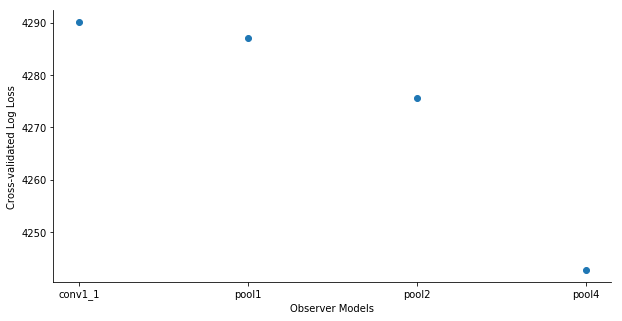

In [121]:
# 3. Fit logistic regression
def fit_logistic_regression(bd, obs_lays, obs_rfs, feature_distance):
    valid = np.logical_not(np.isnan(bd['correct']))
    loss = np.zeros((len(obs_lays),len(obs_rfs)))
    for i, obs_lay in enumerate(obs_lays):
        for j, obs_rf in enumerate(obs_rfs):
            feat_dist = feature_distance[obs_rf+'_'+obs_lay]

            # get cross validated predictions.
            logReg = LogisticRegression(class_weight='balanced')
            y_pred = cross_val_predict(logReg, feat_dist[valid].reshape(-1,1), bd['correct'][valid], cv=10, method='predict_proba')
            loss[i,j] = -np.sum(get_log_loss(bd['correct'][valid], y_pred[:,1]))
    return loss

loss = fit_logistic_regression(bd, obs_lays, obs_rfs, feature_distance)

# Plot log loss
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(np.arange(len(obs_lays)), loss, 'o')
plt.ylabel('Cross-validated Log Loss')
plt.xlabel('Observer Models')
ax.set_xticks(np.arange(len(obs_lays)))
ax.set_xticklabels(obs_lays);
#sns.despine()

In [120]:
-np.nansum(get_log_loss(bd['correct'][valid], model_performance[valid]))

/Users/akshay/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/akshay/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


inf

/Users/akshay/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/akshay/anaconda2/envs/myenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


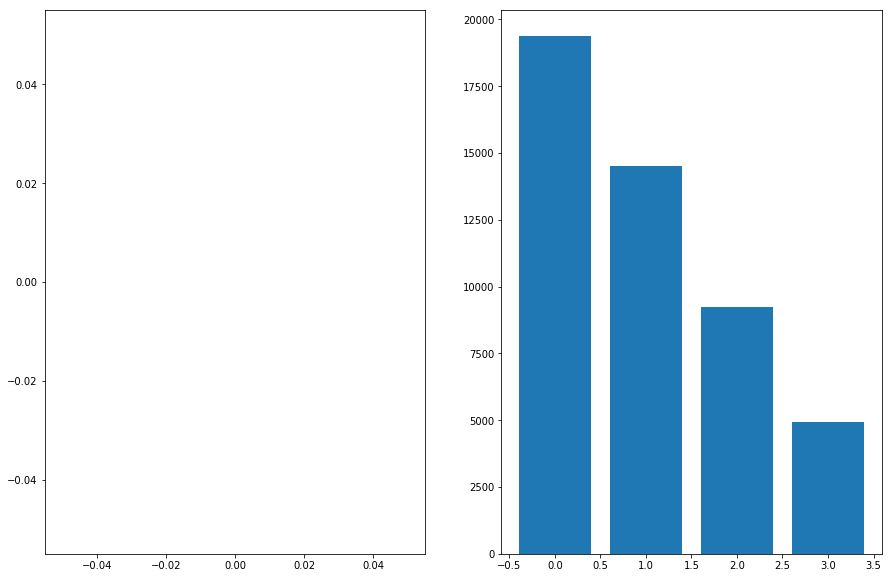

In [117]:
convert = lambda p: np.max(np.min(p, 1−np.power(10−15)), 10^-15)

valid = np.logical_not(np.isnan(bd['correct']))
hm1, hm2 = np.zeros((len(obs_lays),)), np.zeros((len(obs_lays),))
for i, obs_lay in enumerate(obs_lays):
    model_performance = trial_correct[obs_lay]
    feat_dist = feature_distance[obs_lay]
    hm1[i] = -np.sum(get_log_loss(bd['correct'][valid], model_performance[valid]))
    hm2[i] = -np.sum(get_log_loss(bd['correct'][valid], feat_dist[valid]))

fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1);
plt.bar(np.arange(len(obs_lays)), hm1);

plt.subplot(1,2,2);
plt.bar(np.arange(len(obs_lays)), hm2);